In [7]:
import math
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt

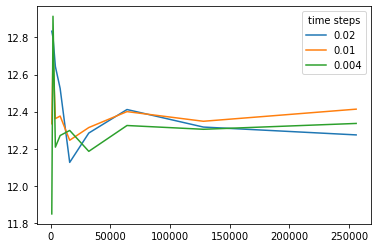

In [8]:
M = np.multiply(1000,[1,2,4,8,16,32,64,128, 256], dtype=object) # number of simulations
delts = np.multiply(1/250,[5, 2.5, 1]) # time steps (in financial year)
sigma = 0.25 # volatility
r = 0.05 # risk-free rate
T = 1 # Time to expiry
K = 100 # strike price
S_init = 100 # initial asset price

np.random.seed(100)


for d in np.arange(np.size(delts)):
    delt = delts[d]
    drift = r*delt
    sigma_sqrt_delt = sigma*math.sqrt(delt)
    N = T/delt
    V = np.zeros(np.size(M)) # non-arbitrage value of option
    sd1 = np.zeros(np.size(M))
    for m in np.arange(np.size(M)):
        N_sim = M[m]
        S = np.ones(N_sim)*S_init
        call_payoff = np.zeros(N_sim)
        for i in np.arange(N): #timestep loop
            S = S + S*(drift + sigma_sqrt_delt* np.random.normal(0,1, N_sim))
            S[S<0] = 0 # check to ensure S cannot be < 0
        call_payoff = S-K
        call_payoff[call_payoff<0] = 0
        V[m] = math.exp(-r*T) * sum(call_payoff)/N_sim
        if d==0:
            sd1[m] = sum((call_payoff*math.exp(-r*T)-V[m])**2/(N_sim-1))**(1/2) 
    if d==0 :
        V1 = V
        upper = V1 + 1.96*sd1/math.sqrt(M[0])
        lower = V1 - 1.96*sd1/math.sqrt(M[0])
        price = blsprice(S_init, K, r, T, sigma)[0]
        
    plt.plot(M, V)
    plt.legend(delts, title='time steps')


Observe the plot above, we conclude that the pay-off of a call options is more volatile with shorter time steps $\Delta t$ and smaller number of simulations $M$. As the number of simulation increases, the option value obtained using Monte Carlo Simulation coverge with all different time steps.

In [6]:
import pandas as pd

data  = np.transpose([M,V1,lower,upper])

dfsbc = pd.DataFrame(data,columns=["M","estimated option value","lower bound of 95% CI","upper bound of 95% CI"])

dfsbc = dfsbc.append({"M" : 'blsprice',
                       "estimated option value" : price,
                     "upper bound of 95% CI":"",
                      "lower bound of 95% CI":""} , 
                      ignore_index=True)
display(dfsbc.style.hide_index())  

M,estimated option value,lower bound of 95% CI,upper bound of 95% CI
1000,12.833109,11.619732,14.046485
2000,12.799095,11.614505,13.983684
4000,12.643380,11.477161,13.809599
8000,12.524763,11.349100,13.700425
16000,12.126628,10.986548,13.266709
32000,12.284757,11.147138,13.422376
64000,12.411365,11.266180,13.556550
128000,12.316945,11.173567,13.460323
256000,12.274743,11.135530,13.413956
blsprice,12.335999,,
